# Introduction to Image Processing

Mojdeh Rastgoo - Desire Sidibe

## 1. Introduction to scikit-image

The modules which are commonly used are entered in the following cell.

In [2]:
%matplotlib inline
%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

Pretty printing has been turned OFF


### 1.1 Image in skimage

The first step of this practise is to learn the procedure to deal with image in `python`.

In this regard, you will need to refer to two main modules of *skimage*. The first module will give all information about [input-output](http://scikit-image.org/docs/dev/api/skimage.io.html) in order to read, write, and show image. The second module is as important and refers to the [utility functions](http://scikit-image.org/docs/stable/api/skimage.html) which allow you to know what is the data type of the images.

#### IO module

In this part, you will rely on the module **io** of the `skimage`. This module can be imported as:

In [14]:
from skimage import io

Now, any function of this module can be called by `io.name_of_the_function`. See the following [webpage](http://scikit-image.org/docs/dev/api/skimage.io.html) to know all the functions available and the arguments of each of them.

##### imread() and imshow()

We will first play with the functions `io.imread()` and `io.imshow()` in order to read and show images. Refer to the documentation to know about the input and output arguments associated with this function. 

** Q.1 Read the grayscale image called `lena-grey.bmp` and show the output.**

** Q.2 Display the shape and data type of the image **
Refer to function [`shape()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and [`dtype()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html) from the `numpy` library.

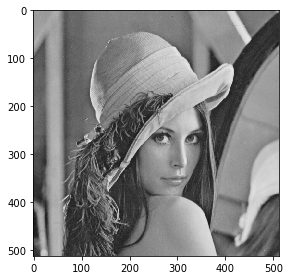

In [15]:
image_path = './images/'
image_name='lena-grey.bmp'
lena_im=io.imread(image_path.__add__(image_name))
io.imshow(lena_im)

In [30]:
lena_im.shape
lena_im.dtype   

dtype('uint8')

The `io.imshow()` function is provided by the `skimage` library. However, it is interesting to know that this function is herited from the very well known `matplotlib` library. This library has been imported in the preamble of this document and can be called with the prefix `plt`. For instance, we can show an image using:
```
plt.imshow(image_name)

```

** Q.3 Show the lena-grey image using matplotlib library.**

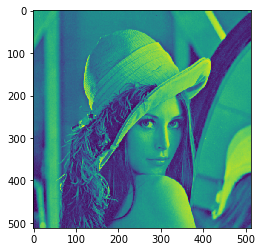

In [27]:
plt.imshow(lena_im)

You can see that this image is displayed with false color. Each gray level is replaced by a given color. This mapping is known as `colormap`. To obtain similar results than in `skimage`, we need to apply a grey colormap. 

```
   plt.imshow(..., cmap = cm.Greys_r)
```

More information about colormap can be found [here](http://matplotlib.org/examples/color/colormaps_reference.html).

**Q.4 Display the image using matplotlib.pyplot library in grey**



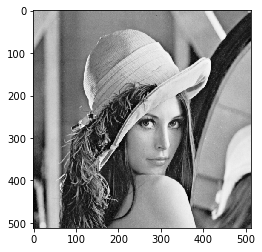

In [31]:
plt.imshow(lena_im, cmap = cm.Greys_r)

** Q.5 Repeat the same manipulation using color image `vibot-color.jpg` **

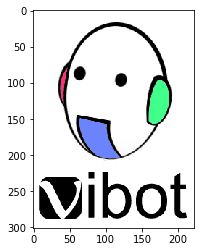

In [38]:
color_image='vibot-color.jpg'
vibot_color=io.imread(image_path.__add__(color_image))

#io.imshow(vibot_color)

#plt.imshow(vibot_color)

plt.imshow(vibot_color, cmap = cm.Greys_r)

** Q.6 Check the documentation of the function `imread` from skimage and open the previous color image as a grey scale image.**

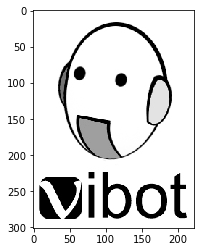

In [39]:
vibot_color=io.imread(image_path.__add__(color_image),True)
plt.imshow(vibot_color, cmap = cm.Greys_r)

Observe attentively the change of the data type.

### 1.2 Data type

It is important to understand which type of data do you obtain once the image is loaded. Subsequent algorithms will require a certain type (*ie.*, float, unsigned int) included in a certain data range. That is why, you need to refer to the [utility functions](http://scikit-image.org/docs/stable/api/skimage.html) in order to perform the right conversion between types.

** Q.7 Re-open the data from the grey-scale image `lena-grey.bmp` and print the matrix and the type which have been loaded by default.**

In [42]:
lena_im

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ..., 
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

A set of functions allow to make automatic conversion between type and range and can be called as `img_as_type()`. 

Usually, algorithms expect images as float type in the range [0.0, 1.0]. However, the previous data were coded with 8-bits unsigned integer. 

**Q.8 Convert the data into float included in the range [0.0, 1.0].**

In [76]:
import skimage
new_lena = skimage.img_as_float(lena_im)
new_lena

array([[ 0.63529412,  0.63529412,  0.63529412, ...,  0.66666667,
         0.60784314,  0.50196078],
       [ 0.63529412,  0.63529412,  0.63529412, ...,  0.66666667,
         0.60784314,  0.50196078],
       [ 0.63529412,  0.63529412,  0.63529412, ...,  0.66666667,
         0.60784314,  0.50196078],
       ..., 
       [ 0.16862745,  0.16862745,  0.19607843, ...,  0.40784314,
         0.39215686,  0.38431373],
       [ 0.17254902,  0.17254902,  0.21568627, ...,  0.40784314,
         0.41176471,  0.42352941],
       [ 0.17254902,  0.17254902,  0.21568627, ...,  0.40784314,
         0.41176471,  0.42352941]])

Lets save the created float image using the **io** module from skimage

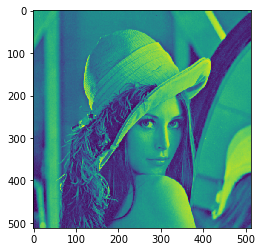

In [54]:
plt.imshow(new_lena)
#plt.imshow(lena_im)

### 1.3 Image distribution and its histogram 
Now lets see the distribition of the intensity values within a image.

**Q.9 Check the functions `skimage.exposure.histogram` and `np.histogram` and identify how you can use them to plot the histogram of an image **
 

In [107]:
ski_hist = skimage.exposure.histogram(lena_im,nbins=256)

In [108]:
numpy_hist = np.histogram(lena_im)

In [111]:
np.histogram??

** Q.10 try to plot the histogram using `matplotlib.pyplot.hits` function**

In [109]:
#plt.hist(lena_im)

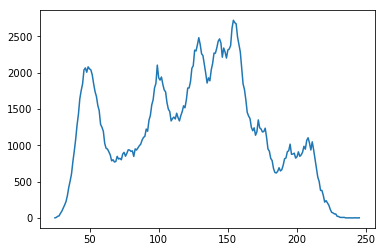

In [110]:
(y,x)=ski_hist
plt.plot(x,y)

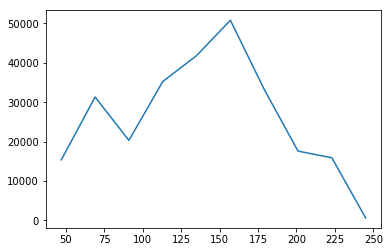

In [112]:
(y,x)=numpy_hist
plt.plot(x[1:],y)

In [106]:
skimage.exposure.histogram??

In [3]:
np.histogram??